In [2]:
import osmium
import shapely.wkb
import pandas as pd
import geopandas as gpd


# https://max-coding.medium.com/getting-administrative-boundaries-from-open-street-map-osm-using-pyosmium-9f108c34f86
# https://download.geofabrik.de/
region = "ukraine"

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

class AdminAreaHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)

        self.areas = []
        self.wkbfab = osmium.geom.WKBFactory()

    def area(self, a):            
        try:
            if  "admin_level" in a.tags:

                wkbshape = self.wkbfab.create_multipolygon(a)
                shapely_obj = shapely.wkb.loads(wkbshape, hex=True)
                
                area = { "id": a.id, "geo": shapely_obj }
                area = merge_two_dicts(area, a.tags)
                
                self.areas.append(area)
        except:
            pass
        
handler = AdminAreaHandler()

# path to file to local drive
# download from https://download.geofabrik.de/index.html
# osm_file = f"/kaggle/input/ukrainelatestosmpbf/ukraine-latest.osm.pbf"
osm_file = r"C:\Users\krawc\Downloads\mazowieckie-latest.osm.pbf"

# start data file processing
handler.apply_file(osm_file, locations=True, idx='flex_mem')

df = pd.DataFrame(handler.areas)
gdf = gpd.GeoDataFrame(df, geometry="geo")
gdf

,id,geo,addr:city,addr:housenumber,addr:postcode,addr:street,admin_level,amenity,building,building:levels,...,name:nb,name:ps,name:si,name:te,name:vls,name:zh-Hans,name:zh-Hant,ref,ref:nuts,ref:nuts:1
0,11715610,"MULTIPOLYGON (((21.04507 52.14917, 21.04520 52...",Warszawa,61,02-777,Aleja Komisji Edukacji Narodowej,7,townhall,city_hall,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11715612,"MULTIPOLYGON (((21.02750 52.07368, 21.02771 52...",Piaseczno,5,05-500,Tadeusza Kościuszki,7,townhall,city_hall,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57646870,"MULTIPOLYGON (((21.01053 52.22799, 21.01075 52...",Warszawa,43,00-691,Nowogrodzka,7,townhall,public,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58776166,"MULTIPOLYGON (((21.00012 52.24326, 21.00030 52...",Warszawa,3/5,00-142,Plac Bankowy,9,townhall,government,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62493030,"MULTIPOLYGON (((20.84307 52.18173, 20.84314 52...",Piastów,2,05-820,11 Listopada,8,townhall,townhall,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,6775339,"MULTIPOLYGON (((20.98832 51.44649, 20.98834 51...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6447,31552435,"MULTIPOLYGON (((22.87715 52.26083, 22.87737 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6448,32502583,"MULTIPOLYGON (((22.86611 52.20416, 22.86864 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6449,32503653,"MULTIPOLYGON (((22.86355 52.22853, 22.86663 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

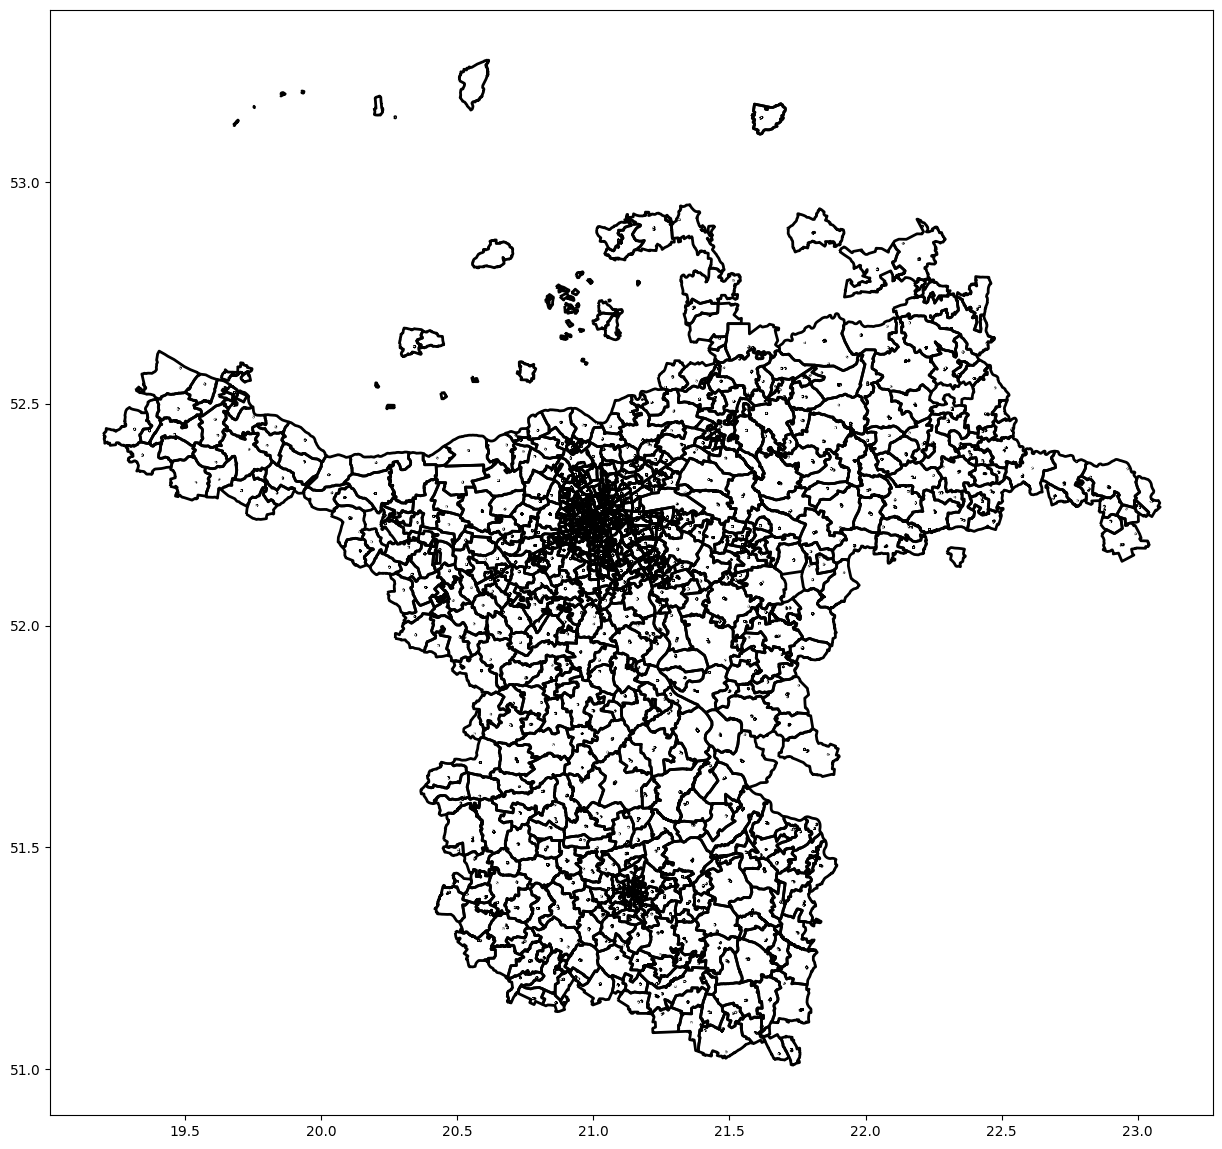

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
test.set_crs(crs=4326).plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')



In [ ]:
in_ukraine = gdf.within(gdf[gdf.admin_level == "2"].geo.iloc[0])

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()

# country boundary
gdf[(gdf.admin_level == "2")].set_crs(crs=4326).plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

# admin level 4 boundaries
admin_level_4_gdf = gdf[(in_ukraine & (gdf.admin_level=="4") & (~gdf["ISO3166-2"].isna()))].set_crs(crs=4326)
admin_level_4_gdf.plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# add labels
for idx, row in admin_level_4_gdf.iterrows():
    ax.annotate(text=row["name:en"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)

In [25]:
# name                                            Cegielnia-Kosewo
# boundary                                          administrative
# name:prefix                                             sołectwo
# teryt:typ                                                   wieś

c1 = gdf.admin_level == "8"
c3 = gdf['boundary']=='administrative'
c4 = gdf['name']=='Warszawa'

gdf[c3&c4]
dict(gdf.iloc[5715].dropna())

{'id': 672149,
 'geo': <MULTIPOLYGON (((20.852 52.201, 20.852 52.201, 20.852 52.201, 20.852 52.201,...>,
 'admin_level': '8',
 'name': 'Warszawa',
 'wikidata': 'Q270',
 'name:de': 'Warschau',
 'name:en': 'Warsaw',
 'name:es': 'Varsovia',
 'name:fr': 'Varsovie',
 'name:ko': '바르샤바',
 'name:nl': 'Warschau',
 'name:ru': 'Варшава',
 'name:zh': '华沙',
 'wikipedia': 'pl:Warszawa',
 'boundary': 'administrative',
 'name:pl': 'Warszawa',
 'name:prefix': 'miasto',
 'population': '1777972',
 'source:population': 'https://www.citypopulation.de/en/poland/cities/',
 'name:uk': 'Варшава',
 'teryt:simc': '0918123',
 'name:lt': 'Varšuva',
 'teryt:rm': '96',
 'name:dative': 'Warszawie',
 'name:fi': 'Varsova',
 'capital': 'yes',
 'name:ab': 'Варшава',
 'name:ace': 'Warsawa',
 'name:af': 'Warskou',
 'name:ak': 'Warsaw',
 'name:am': 'ዋርሶው',
 'name:an': 'Varsovia',
 'name:ang': 'Warsaw',
 'name:ar': 'وارسو',
 'name:arc': 'ܘܐܪܣܘ',
 'name:arz': 'وارسو',
 'name:ast': 'Varsovia',
 'name:az': 'Varşava',
 'name:ba'

In [5]:
gdf[gdf.admin_level == "8"]

# idx 5715
# {'id': 672149,
#  'admin_level': '8',
#  'name': 'Warszawa',
#  'wikidata': 'Q270',
#   'wikipedia': 'pl:Warszawa',
#  'boundary': 'administrative',
#  'population': '1777972',
#  'teryt:simc': '0918123',
# 'teryt:terc': '1465068',
#  'teryt:rm': '96',
#   'capital': 'yes',
#   'rank': '10',
#  }

,id,geo,addr:city,addr:housenumber,addr:postcode,addr:street,admin_level,amenity,building,building:levels,...,name:nb,name:ps,name:si,name:te,name:vls,name:zh-Hans,name:zh-Hant,ref,ref:nuts,ref:nuts:1
4,62493030,"MULTIPOLYGON (((20.84307 52.18173, 20.84314 52...",Piastów,2,05-820,11 Listopada,8,townhall,townhall,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5848353,"MULTIPOLYGON (((22.22055 52.18897, 22.22077 52...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,213853098,"MULTIPOLYGON (((20.81242 52.16238, 20.81245 52...",Pruszków,14/16,05-800,Józefa Ignacego Kraszewskiego,8,townhall,townhall,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,3507639,"MULTIPOLYGON (((20.98094 52.40260, 20.98241 52...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,327616000,"MULTIPOLYGON (((20.72720 52.12191, 20.72720 52...",Podkowa Leśna,39/41,05-807,Akacjowa,8,townhall,townhall,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,31490111,"MULTIPOLYGON (((21.73672 52.42520, 21.73686 52...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6443,32468125,"MULTIPOLYGON (((22.02997 52.16513, 22.03004 52...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6444,31537701,"MULTIPOLYGON (((22.07603 52.33824, 22.07953 52...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6445,6777921,"MULTIPOLYGON (((20.95319 51.44859, 20.95327 51...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
wawa = gdf.iloc[5715]
in_wawa = gdf[gdf.within(wawa.geo)]
in_wawa

,id,geo,addr:city,addr:housenumber,addr:postcode,addr:street,admin_level,amenity,building,building:levels,...,name:nb,name:ps,name:si,name:te,name:vls,name:zh-Hans,name:zh-Hant,ref,ref:nuts,ref:nuts:1
0,11715610,"MULTIPOLYGON (((21.04507 52.14917, 21.04520 52...",Warszawa,61,02-777,Aleja Komisji Edukacji Narodowej,7,townhall,city_hall,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57646870,"MULTIPOLYGON (((21.01053 52.22799, 21.01075 52...",Warszawa,43,00-691,Nowogrodzka,7,townhall,public,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58776166,"MULTIPOLYGON (((21.00012 52.24326, 21.00030 52...",Warszawa,3/5,00-142,Plac Bankowy,9,townhall,government,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,68856400,"MULTIPOLYGON (((20.95895 52.19206, 20.95913 52...",Warszawa,257,02-133,Aleja Krakowska,7,townhall,government,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,124686746,"MULTIPOLYGON (((21.08219 52.16475, 21.08221 52...",Warszawa,2,02-797,Franciszka Klimczaka,7,townhall,office,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,29962591,"MULTIPOLYGON (((21.05526 52.31421, 21.05530 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6354,22967309,"MULTIPOLYGON (((20.93950 52.30083, 20.94118 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6355,22964183,"MULTIPOLYGON (((20.97056 52.28530, 20.97254 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6356,29959239,"MULTIPOLYGON (((20.97774 52.29452, 20.98112 52...",NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
c1=in_wawa['admin_level']=='9'
c2=in_wawa['name:prefix']=='dzielnica'
in_wawa[c2]['name']
# dict(in_wawa.loc[2963].dropna())

dzielnice = in_wawa[c2]

In [66]:
c1=in_wawa['admin_level']=='10'
c2=in_wawa['boundary']=='administrative'
c3=in_wawa['name']=='Kamionek'
# 'name:prefix' == 'osiedle'
# 53                     Gocław
# 54      Przyczółek Grochowski
# 5581               Saska Kępa
# 6257                 Kamionek
# in_wawa[c1&c2&c3]['name']
# dict(in_wawa.loc[343].dropna())
# 'name:prefix': 'obszar Miejskiego Systemu Informacji',

osiedla=in_wawa[c1&c2]

<AxesSubplot: >

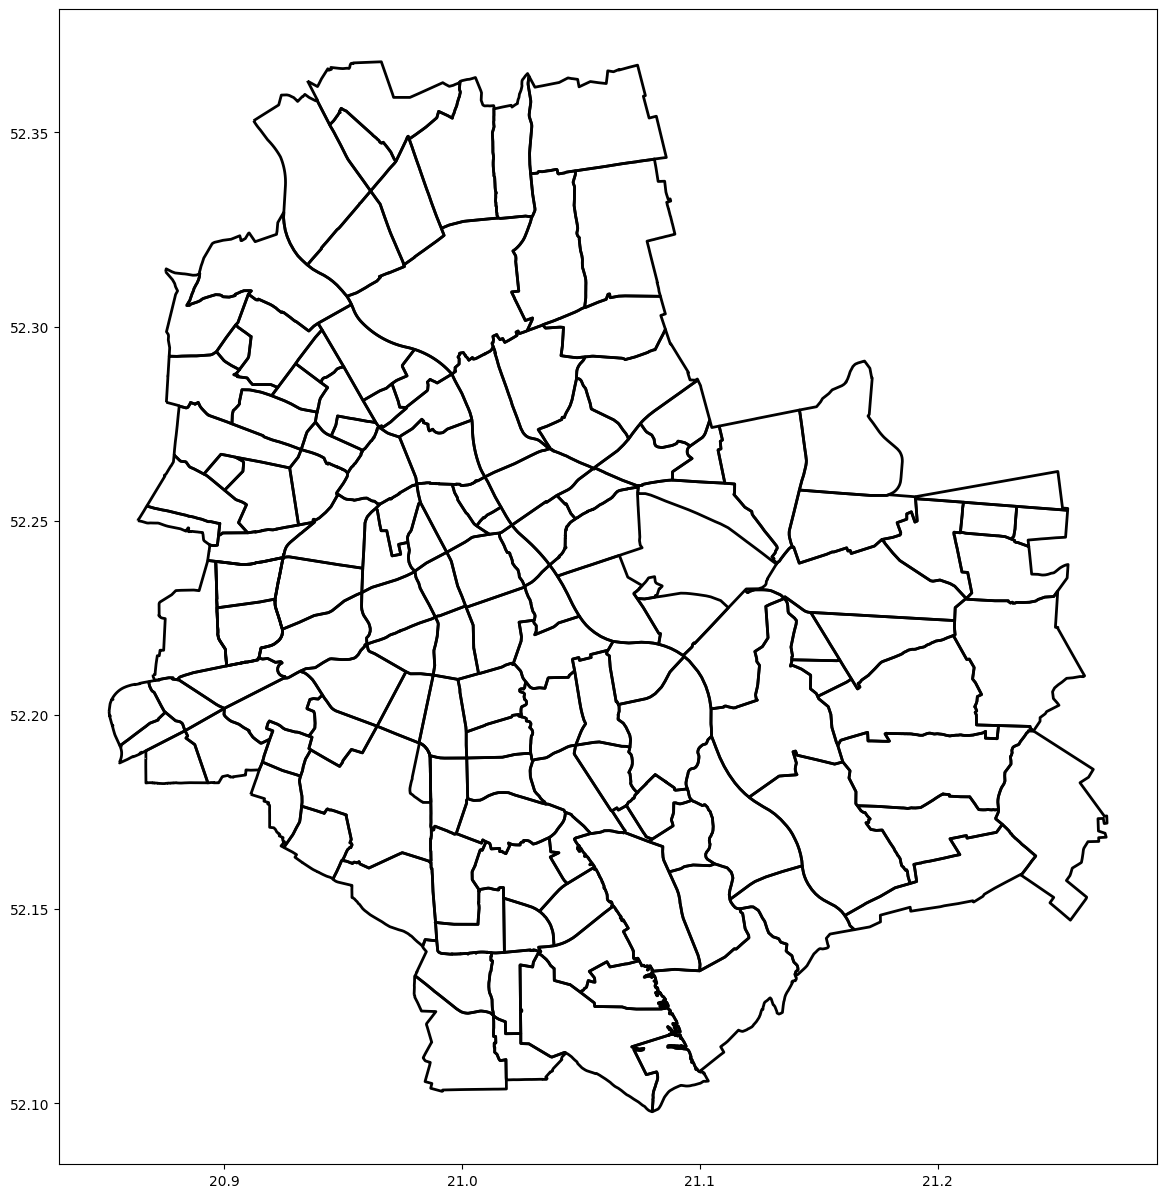

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
osiedla.set_crs(crs=4326).plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

In [98]:
c1=in_wawa['name:prefix']=='obszar Miejskiego Systemu Informacji'
c2=in_wawa['name'].str.contains('Groch')

in_wawa[c2].dropna(axis=1)

,id,geo,admin_level,name,boundary
54,5088573,"MULTIPOLYGON (((21.07218 52.23129, 21.07363 52...",10,Przyczółek Grochowski,administrative
1727,5088567,"MULTIPOLYGON (((21.07843 52.23530, 21.08098 52...",11,Grochów-Południowy,administrative
4759,5088569,"MULTIPOLYGON (((21.09088 52.24488, 21.09191 52...",11,Grochów-Północny,administrative
4760,28410783,"MULTIPOLYGON (((21.07383 52.25699, 21.07710 52...",10,Olszynka Grochowska,administrative
4940,5088563,"MULTIPOLYGON (((21.07379 52.25679, 21.07380 52...",11,Grochów-Centrum,administrative
5584,29964019,"MULTIPOLYGON (((21.06422 52.24069, 21.06768 52...",10,Parafia Matki Bożej Królowej Polskich Męczenni...,religious_administration
5585,29967275,"MULTIPOLYGON (((21.06417 52.25596, 21.06505 52...",10,Parafia Świętej Rity z Cascii w Warszawie-Groc...,religious_administration
5586,29965305,"MULTIPOLYGON (((21.07473 52.24543, 21.07527 52...",10,Parafia Nawrócenia Świętego Pawła Apostoła w W...,religious_administration
5653,29964917,"MULTIPOLYGON (((21.07406 52.25823, 21.08285 52...",10,Parafia Najczystszego Serca Maryi w Warszawie-...,religious_administration
6256,5088565,"MULTIPOLYGON (((21.06617 52.24108, 21.06970 52...",11,Grochów-Kinowa,administrative


In [ ]:
gdf.to_csv("ukraine_admin_boundaries.csv")
gdf.to_json()
gdf.to_file("my_file.geojson", driver="GeoJSON")

In [94]:
ex=osiedla.dropna(axis=1)
ex=ex.drop(['boundary'],axis=1)
ex=ex.set_index('id')
# ex.set_crs(crs=4326).to_json()
ex.set_crs(crs=4326).to_file("my_file.geojson", driver="GeoJSON")


In [95]:
ex.to_file("my_file2.geojson", driver="GeoJSON",encoding='utf8')
